In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

## Correlation Analysis

In [2]:
maintainability_categories = {
    "verybad": 1,
    "bad": 2,
    "moderate": 3,
    "good": 4,
    "verygood": 5
}
maintainability_converter = lambda x: maintainability_categories[x]

dataset1 = pd.read_csv("./files/dataset.csv", converters={"Maintainability": maintainability_converter})

array([[<AxesSubplot:title={'center':'NF'}>,
        <AxesSubplot:title={'center':'NM'}>,
        <AxesSubplot:title={'center':'NTop'}>,
        <AxesSubplot:title={'center':'NLeaf'}>],
       [<AxesSubplot:title={'center':'DTMax'}>,
        <AxesSubplot:title={'center':'CogC'}>,
        <AxesSubplot:title={'center':'FEX'}>,
        <AxesSubplot:title={'center':'FoC'}>],
       [<AxesSubplot:title={'center':'SCDF'}>,
        <AxesSubplot:title={'center':'MCDF'}>,
        <AxesSubplot:title={'center':'RDen'}>,
        <AxesSubplot:title={'center':'RoV'}>],
       [<AxesSubplot:title={'center':'NVC'}>,
        <AxesSubplot:title={'center':'NGOr'}>,
        <AxesSubplot:title={'center':'NGXOr'}>,
        <AxesSubplot:title={'center':'Maintainability'}>]], dtype=object)

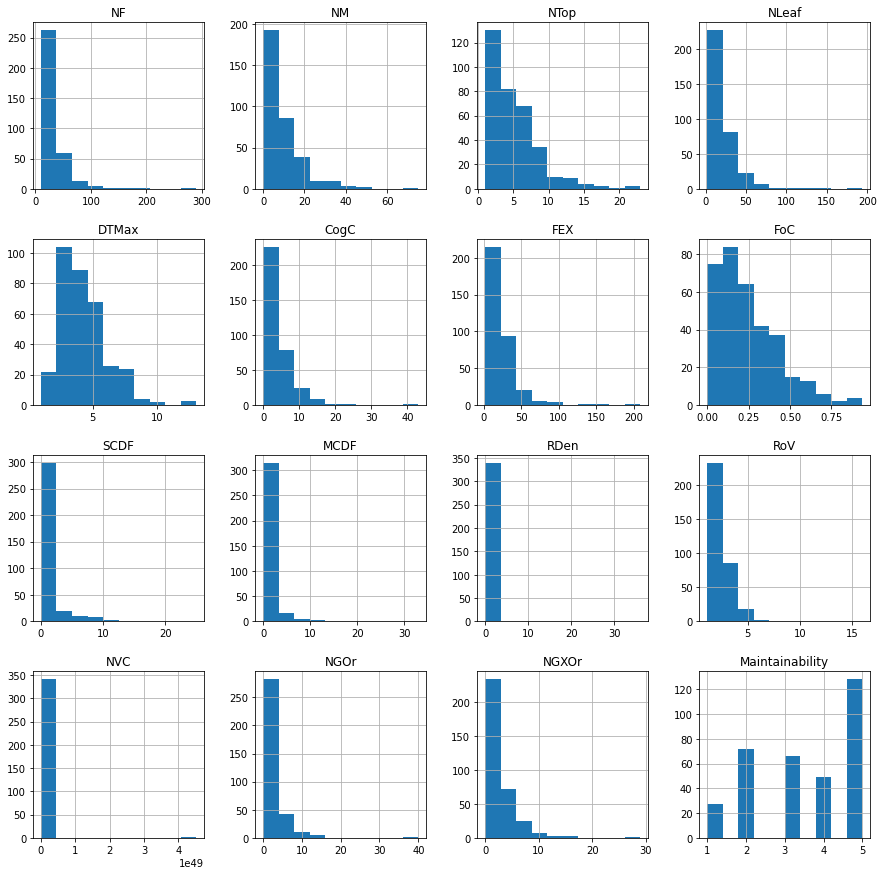

In [3]:
dataset1.hist(figsize=(15, 15))

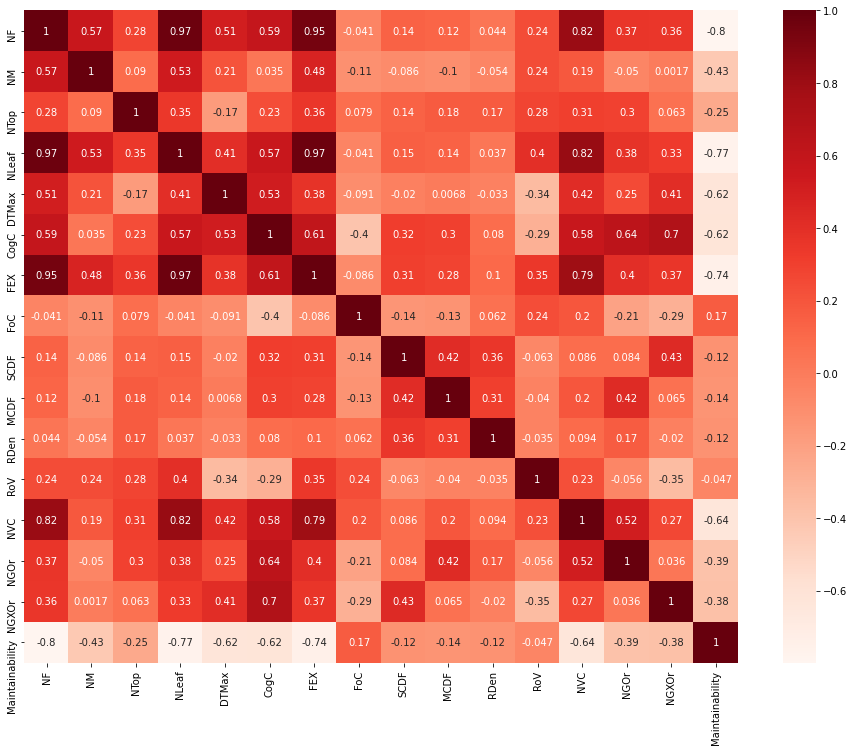

In [4]:
dataset1_corr = dataset1.corr(method='spearman')

plt.figure(figsize=(16,12))

sns.heatmap(dataset1_corr, annot=True, cmap=plt.cm.Reds)

plt.show()

In [5]:
dataset1_corr_mean = dataset1_corr["Maintainability"].abs().mean()

print("\n>> Threshould:", 0.6)
print(dataset1_corr["Maintainability"][dataset1_corr["Maintainability"].abs() >= 0.6])


>> Threshould: 0.6
NF                -0.798777
NLeaf             -0.766385
DTMax             -0.623542
CogC              -0.618869
FEX               -0.743451
NVC               -0.635106
Maintainability    1.000000
Name: Maintainability, dtype: float64


## Select From Model

### Logistic Regression

In [6]:
dataset2 = pd.read_csv('./files/dataset.csv')

X2 = dataset2.iloc[:, 1:-1]
y2 = dataset2.iloc[:, -1]

scaler2 = MinMaxScaler()
clf2 = LogisticRegression(random_state=0)
pipeline2 = make_pipeline(scaler2, clf2)
pipeline2.fit(X2, y2)

select_from_model = SelectFromModel(clf2, prefit=True)

print(X2.columns[select_from_model.get_support()])

Index(['NF', 'NM', 'NTop', 'NLeaf', 'DTMax', 'CogC', 'FEX'], dtype='object')


### Decicion Tree

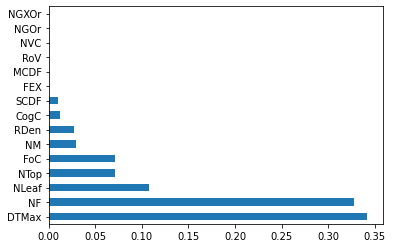

Index(['NF', 'NM', 'NTop', 'NLeaf', 'DTMax', 'CogC', 'FoC', 'SCDF', 'RDen'], dtype='object')


In [7]:
dataset3 = pd.read_csv('./files/dataset.csv')

X3 = dataset3.iloc[:, 1:-1]
y3 = dataset3.iloc[:, -1]

scaler3 = MinMaxScaler()
clf3 = DecisionTreeClassifier(random_state=0, max_depth=5)
pipeline3 = make_pipeline(scaler3, clf3)
pipeline3.fit(X3, y3)

feature_importances = pd.Series(clf3.feature_importances_, index = X3.columns) 
feature_importances.nlargest(15).plot(kind = 'barh') 

plt.show()

print(X3.columns[[i > 0 for i in feature_importances]])